In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [119]:
# load dataset into dataframe
df = pd.read_csv('netflix_titles.csv', encoding='unicode_escape')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [120]:
# Populate na values with placeholder
df = df.fillna('N/A')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,N/A,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,N/A,N/A,N/A,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


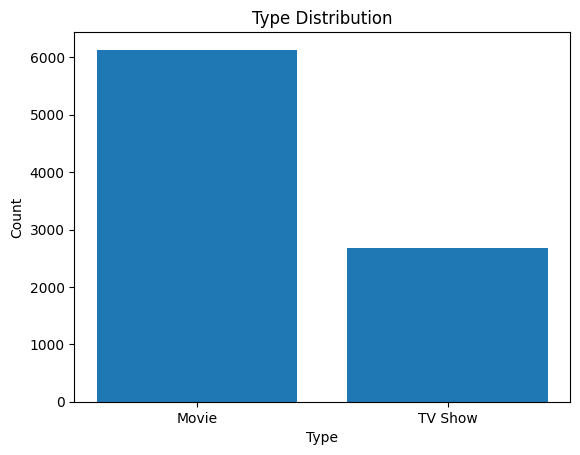

In [121]:
# Type Distribution (Movies vs TV Shows)
type_counts = df['type'].value_counts()

plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Type Distribution')

plt.show()

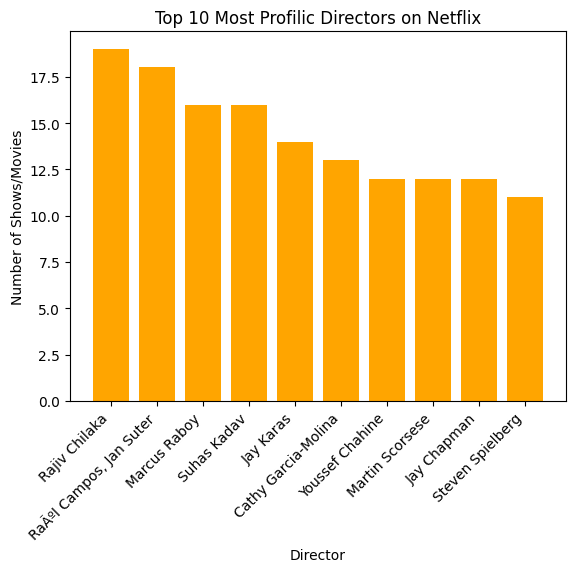

In [122]:
# Most profilic directors
df_valid_directors = df[df['director'] != 'N/A']

director_counts = df_valid_directors['director'].value_counts()

top_directors = director_counts.head(10) # top 10 directors
plt.bar(top_directors.index, top_directors.values, color='orange')

plt.xlabel('Director')
plt.ylabel('Number of Shows/Movies')
plt.title('Top 10 Most Profilic Directors on Netflix')

plt.xticks(rotation=45, ha='right')

plt.show()

In [123]:
# Splitting cast into seperate actors
cast_split = df['cast'].str.split(', ')
df_cast_split = df.loc[df.index.repeat(cast_split.str.len())].assign(cast_split=cast_split.explode())

valid_rows = (df_cast_split['director'] != 'N/A') & (df_cast_split['cast_split'] != 'N/A')
df_valid = df_cast_split[valid_rows]

df_valid.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_split
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Tracy Gotoas
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Samuel Jouy
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Nabiha Akkari
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sofia Lesaffre


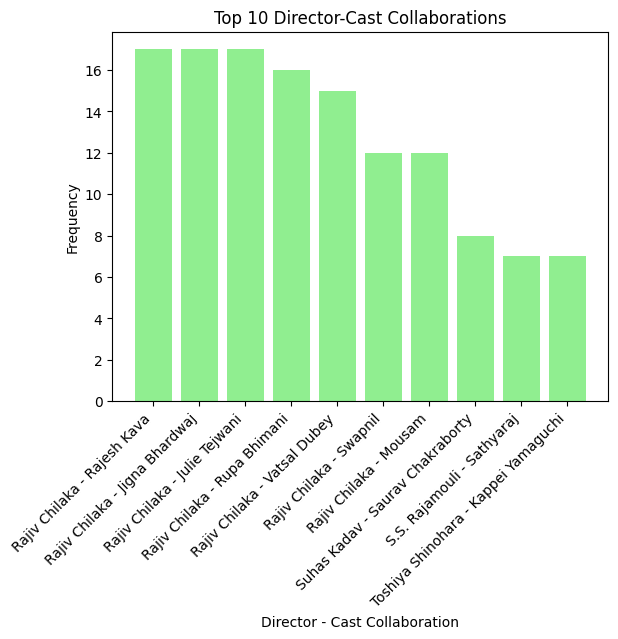

In [124]:
# Director - Cast collaboration frequency
director_cast_combinations = df_valid['director'].astype(str) + ' - ' + df_valid['cast_split']
collab_counter = Counter(director_cast_combinations)

collab_df = pd.DataFrame(collab_counter.items(), columns=['Collaboration', 'Frequency'])
collab_df = collab_df.sort_values(by='Frequency', ascending=False)

top_collabs = collab_df.head(10)

plt.bar(top_collabs['Collaboration'], top_collabs['Frequency'], color='lightgreen')
plt.xlabel('Director - Cast Collaboration')
plt.ylabel('Frequency')
plt.title('Top 10 Director-Cast Collaborations')

plt.xticks(rotation=45, ha='right')

plt.show()
